# RESOLUÇÃO DA SEMANA 8 DO ACELERADEV CODENATION

**Objetivo do desafio**: Prever as notas de matemática dos participantes com base em informações socioeconômicas e notas das outras provas do ENEM 2016.

**Metodologia**: Uso de modelos do tipo regressão.

# IMPORTAÇÃO DAS BIBLIOTECAS

In [4]:
#Importando as biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook
import seaborn as sns

# IMPORTANDO OS DADOS

In [389]:
#importando as bases de dados
enem_treino=pd.read_csv("train.csv")
enem_teste=pd.read_csv("test.csv")

In [390]:
#visualizando as colunas da base de treino
enem_treino.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

In [391]:
#visualizando as colunas da base de teste

#vemos que o número de colunas de cada base de dados são diferentes
enem_teste.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

In [392]:
#atribuindo a uma variável a colunas da base de teste
feature=['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047','NU_NOTA_MT']

In [393]:
#colocando a base de treino com as mesmas dimensões da base de teste
enem_treino=enem_treino[feature]

In [394]:
#visualizando as colunas da base de treino
enem_treino.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047', 'NU_NOTA_MT'], dtype=object)

In [395]:
#visualizando a coluna da base de teste
enem_teste.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

# Análise exploratória

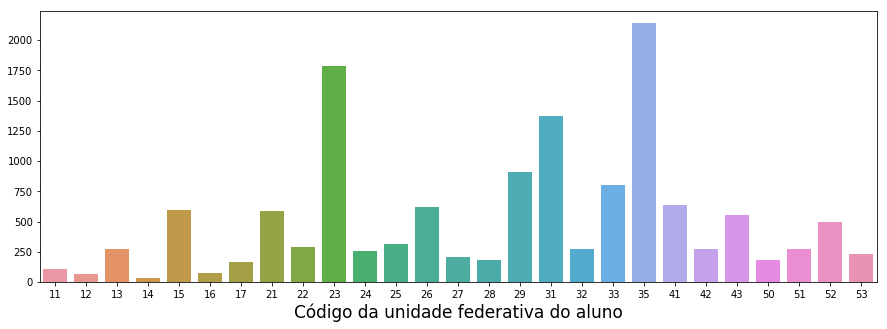

In [396]:
plt.figure(figsize=(15,5))
sns.countplot(x='CO_UF_RESIDENCIA',data=enem_treino)
plt.xlabel('Código da unidade federativa do aluno',size=17)
plt.ylabel('')
plt.show()

#11 - Rondônia - RO
#12 - Acre - AC
#13 - Amazonas - AM
#14 - Roraima - RR
#15 - Pará - PA
#16 - Amapá - AP
#17 - Tocantins - TO
#21 - Maranhão - MA
#22 - Piauí - PI
#23 - Ceará - CE
#24 - Rio Grande do Norte - RN
#25 - Paraíba - PB
#26 - Pernambuco - PE
#27 - Alagoas - AL
#28 - Sergipe - SE
#29 - Bahia - BA
#31 - Minas Gerais - MG
#32 - Espírito Santo - ES
#33 - Rio de Janeiro - RJ
#35 - São Paulo - SP
#41 - Paraná - PR
#42 - Santa Catarina - SC
#43 - Rio Grande do Sul - RS
#50 - Mato Grosso do Sul - MS
#51 - Mato Grosso - MT
#52 - Goiás - GO
#53 - Distrito Federal - DF

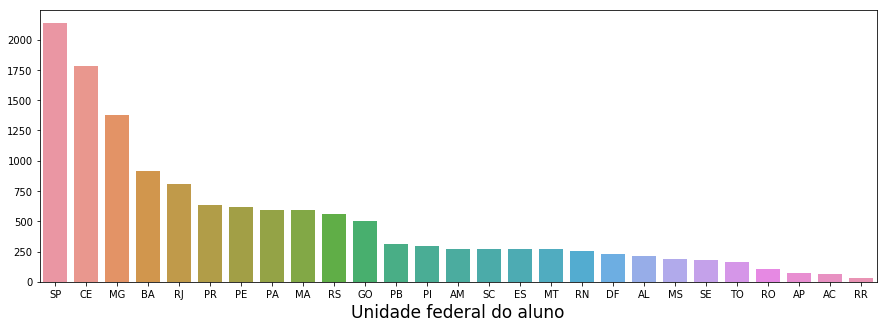

In [397]:
plt.figure(figsize=(15,5))
sns.countplot(x='SG_UF_RESIDENCIA',data=enem_treino,order = enem_treino['SG_UF_RESIDENCIA'].value_counts().index)
plt.xlabel('Unidade federal do aluno',size=17)
plt.ylabel('')
plt.show()

#Aqui podemos ver que os três estados que mais participaram do enem 2016 foram São Paulo, Ceará e Minas Gerais

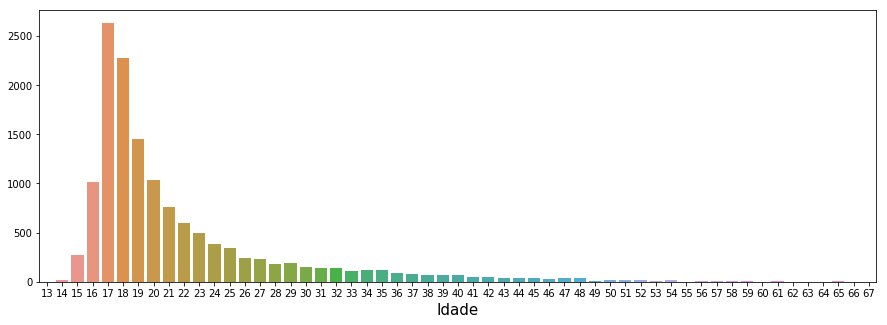

In [398]:
plt.figure(figsize=(15,5))
sns.countplot(x='NU_IDADE',data=enem_treino)
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.show()

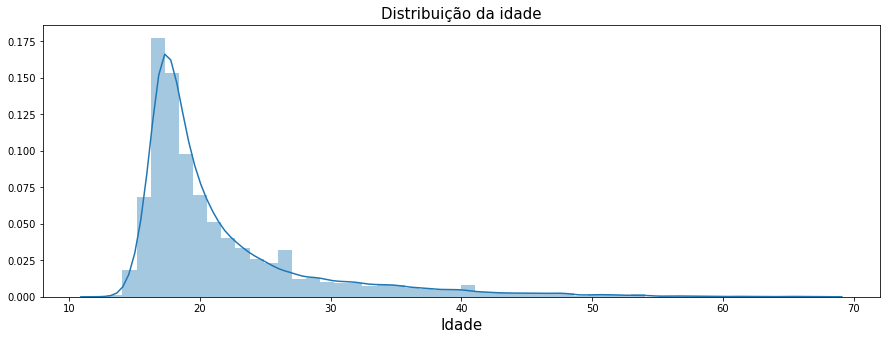

In [399]:
plt.figure(figsize=(15,5))
sns.distplot(enem_treino['NU_IDADE'])
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.title("Distribuição da idade",size=15)
plt.show()

#As idades se concentram em idades menores de 20 anos

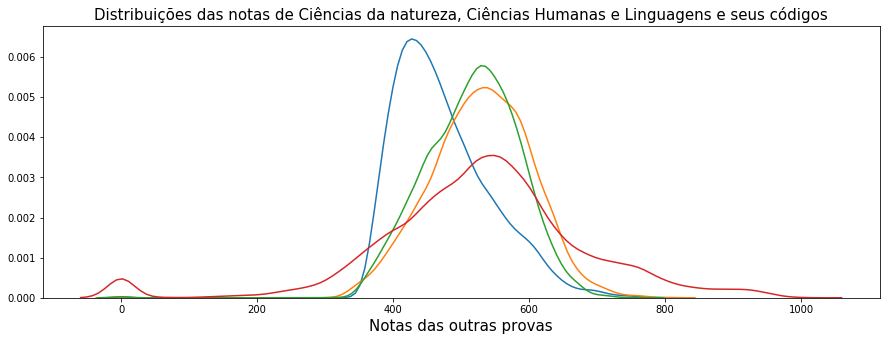

In [400]:
plt.figure(figsize=(15,5))
sns.distplot(enem_treino['NU_NOTA_CN'].dropna(),hist=False)
sns.distplot(enem_treino['NU_NOTA_CH'].dropna(),hist=False)
sns.distplot(enem_treino['NU_NOTA_LC'].dropna(),hist=False)
sns.distplot(enem_treino['NU_NOTA_REDACAO'].dropna(),hist=False)
plt.title('Distribuições das notas de Ciências da natureza, Ciências Humanas e Linguagens e seus códigos',size=15)
plt.xlabel('Notas das outras provas',size=15)
plt.show()

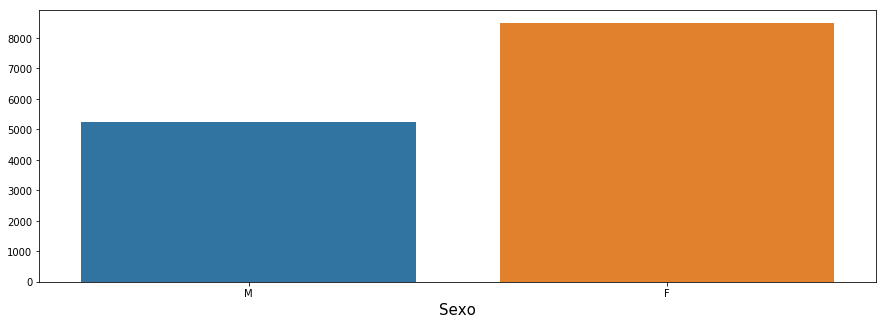

In [401]:
plt.figure(figsize=(15,5))
sns.countplot(x='TP_SEXO',data=enem_treino)
plt.xlabel('Sexo',size=15)
plt.ylabel('')
plt.show()

#A maioria dos participantes são do sexo feminino

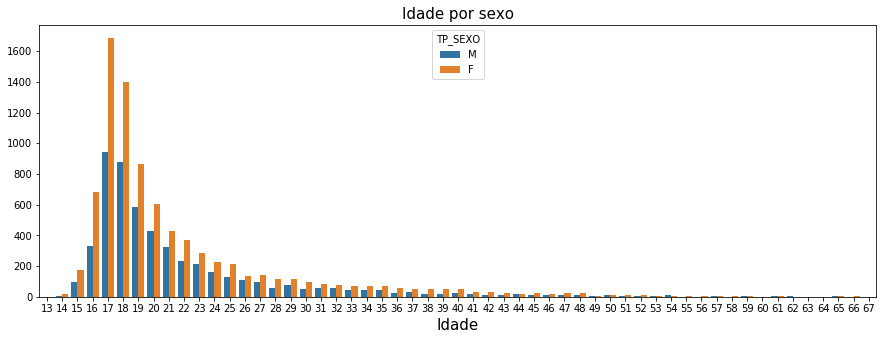

In [402]:
plt.figure(figsize=(15,5))
sns.countplot(x='NU_IDADE', data=enem_treino,hue='TP_SEXO')
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.title("Idade por sexo",size=15)
plt.show()

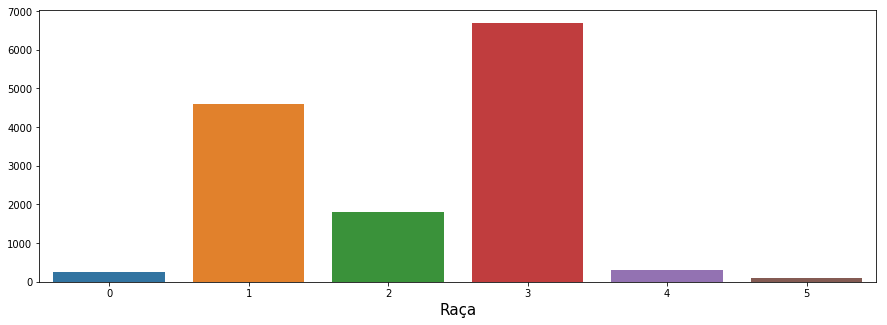

In [403]:
plt.figure(figsize=(15,5))
sns.countplot(x='TP_COR_RACA',data=enem_treino)
plt.xlabel('Raça',size=15)
plt.ylabel('')
plt.show()

#0 - Não declarado
#1 - Branca
#2 - Preta
#3 - Parda
#4 - Amarela
#5 - Indígena 
#6 - Não dispõe da informação


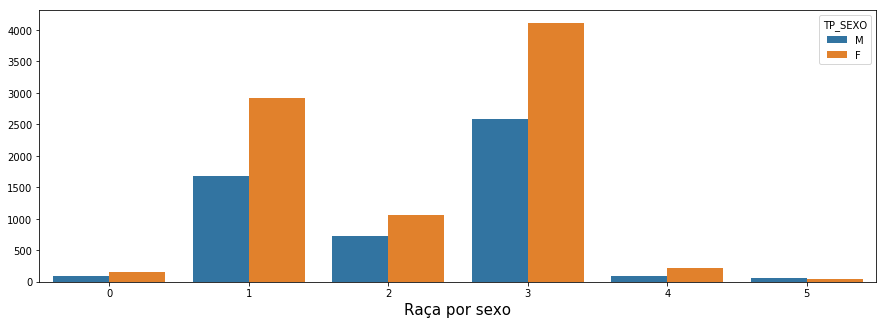

In [404]:
plt.figure(figsize=(15,5))
sns.countplot(x='TP_COR_RACA',data=enem_treino,hue='TP_SEXO')
plt.xlabel('Raça por sexo',size=15)
plt.ylabel('')
plt.show()

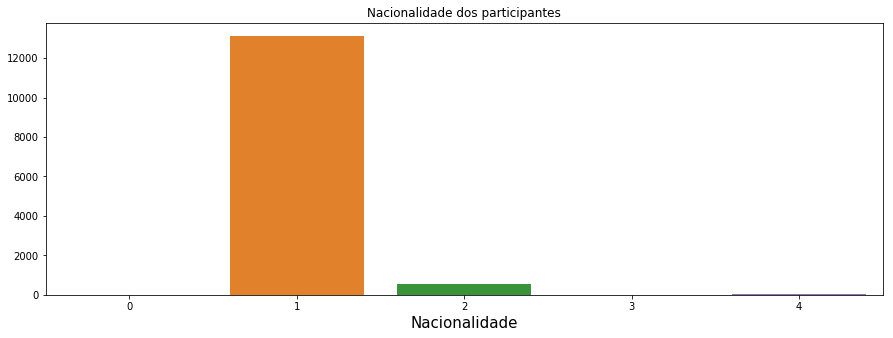

In [405]:
plt.figure(figsize=(15,5))
sns.countplot(x='TP_NACIONALIDADE',data=enem_treino)
plt.xlabel('Nacionalidade',size=15)
plt.ylabel('')
plt.title('Nacionalidade dos participantes')
plt.show()

#0 - Não informado
#1 - Brasileiro(a)
#2 - Brasileiro(a) Naturalizado(a)
#3 - Estrangeiro(a)
#4 - Brasileiro(a) Nato(a), nascido(a) no exterior

#A maioria dos participantes são brasileiros

#uma pequena parte são naturalizados brasileiros ou de brasileiros nascidos no exterior

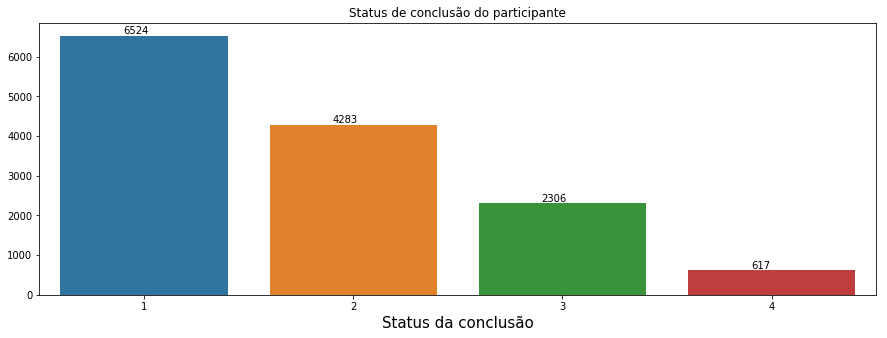

In [406]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_ST_CONCLUSAO',data=enem_treino)
plt.xlabel('Status da conclusão',size=15)
plt.ylabel('')
plt.title('Status de conclusão do participante')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

#1 - Já concluí o Ensino Médio
#2 - Estou cursando e concluirei o Ensino Médio em 2016
#3 - Estou cursando e concluirei o Ensino Médio após 2016
#4 - Não concluí e não estou cursando o Ensino Médio

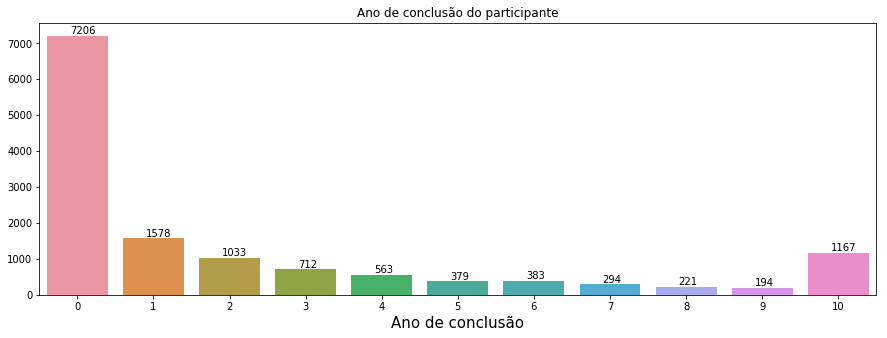

In [407]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_ANO_CONCLUIU',data=enem_treino)
plt.xlabel('Ano de conclusão',size=15)
plt.ylabel('')
plt.title('Ano de conclusão do participante')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

#0 - Não informado
#1 - 2015
#2 - 2014
#3 - 2013
#4 - 2012
#5 - 2011
#6 - 2010
#7 - 2009
#8 - 2008
#9 - 2007
#10 - Anterior a 2007

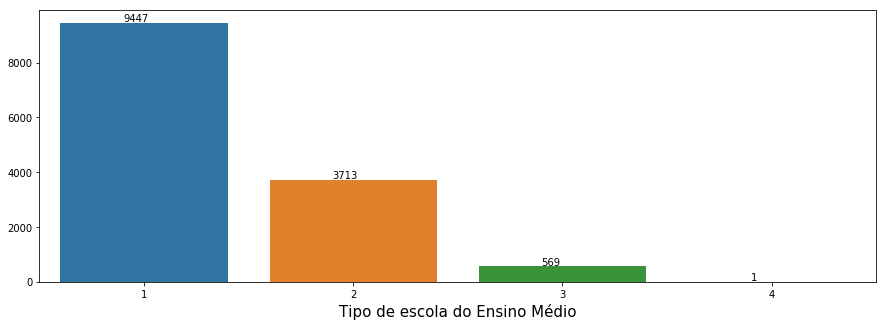

In [408]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_ESCOLA',data=enem_treino)
plt.xlabel('Tipo de escola do Ensino Médio',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

#1 - Não Respondeu
#2 - Pública
#3 - Privada
#4 - Exterior

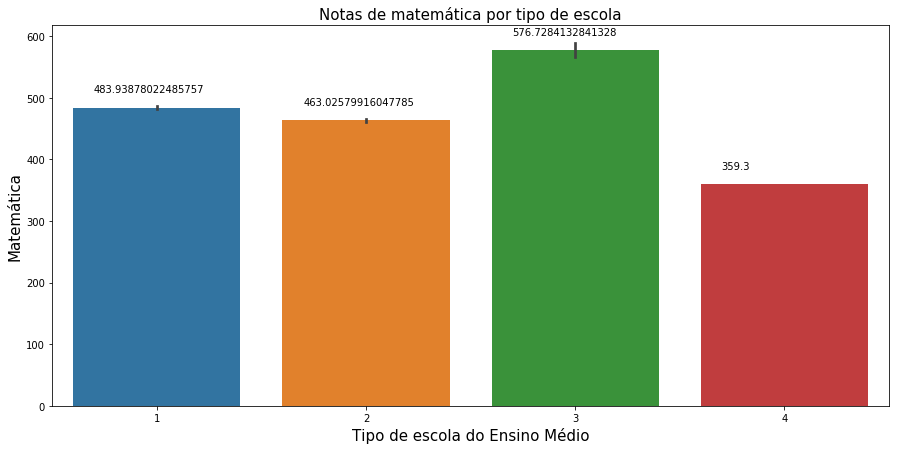

In [409]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_ESCOLA',y='NU_NOTA_MT',data=enem_treino)
plt.xlabel('Tipo de escola do Ensino Médio',size=15)
plt.ylabel('Matemática',size=15)
plt.title('Notas de matemática por tipo de escola',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+25))
plt.show()

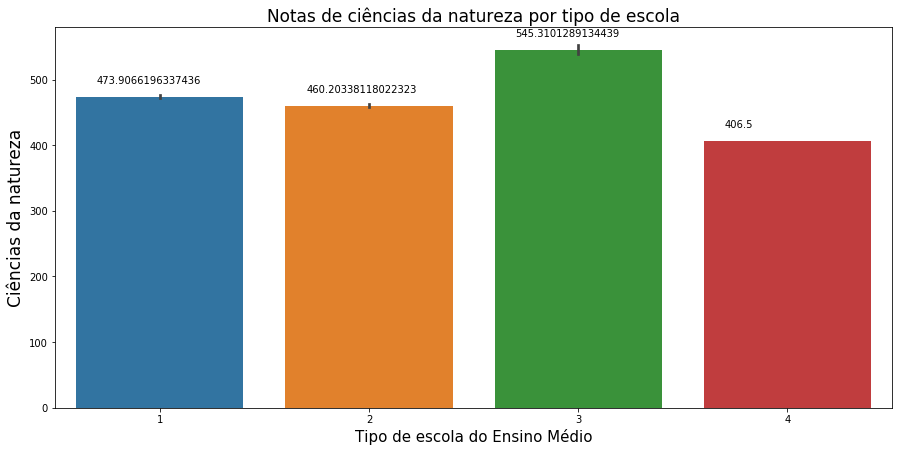

In [410]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_ESCOLA',y='NU_NOTA_CN',data=enem_treino)
plt.xlabel('Tipo de escola do Ensino Médio',size=15)
plt.ylabel('Ciências da natureza',size=17)
plt.title('Notas de ciências da natureza por tipo de escola',size=17)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
plt.show()

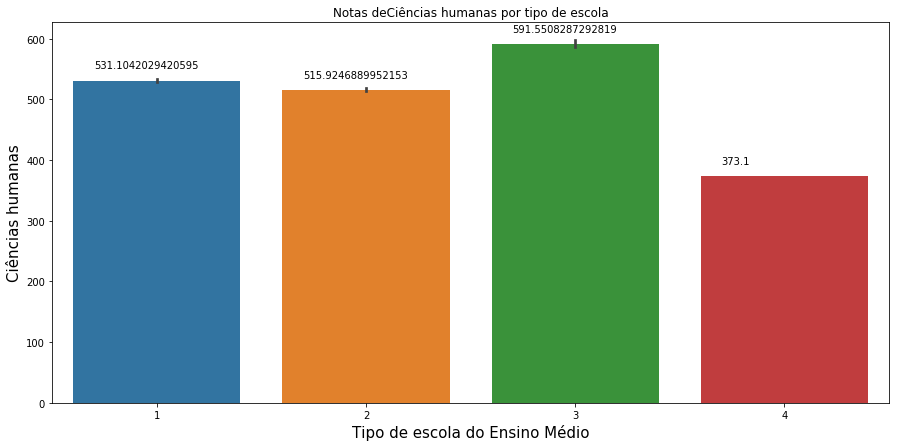

In [411]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_ESCOLA',y='NU_NOTA_CH',data=enem_treino)
plt.xlabel('Tipo de escola do Ensino Médio',size=15)
plt.ylabel('Ciências humanas',size=15)
plt.title('Notas deCiências humanas por tipo de escola')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
plt.show()

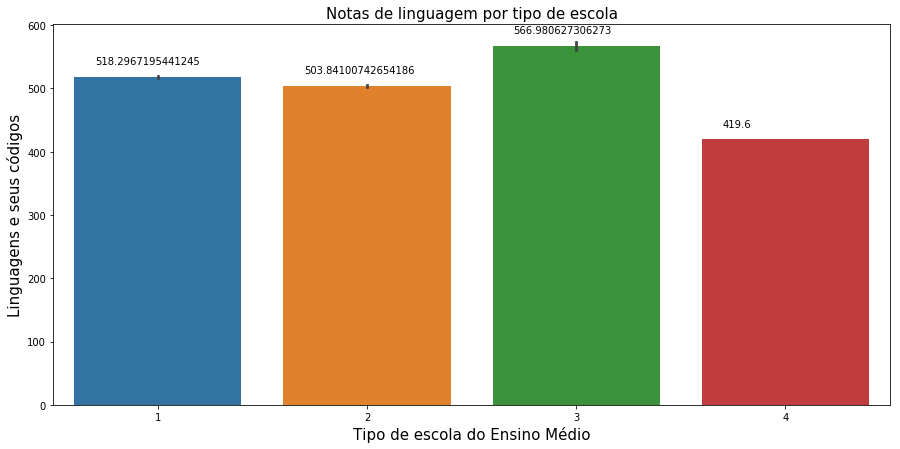

In [412]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_ESCOLA',y='NU_NOTA_LC',data=enem_treino)
plt.xlabel('Tipo de escola do Ensino Médio',size=15)
plt.ylabel('Linguagens e seus códigos',size=15)
plt.title('Notas de linguagem por tipo de escola',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
plt.show()

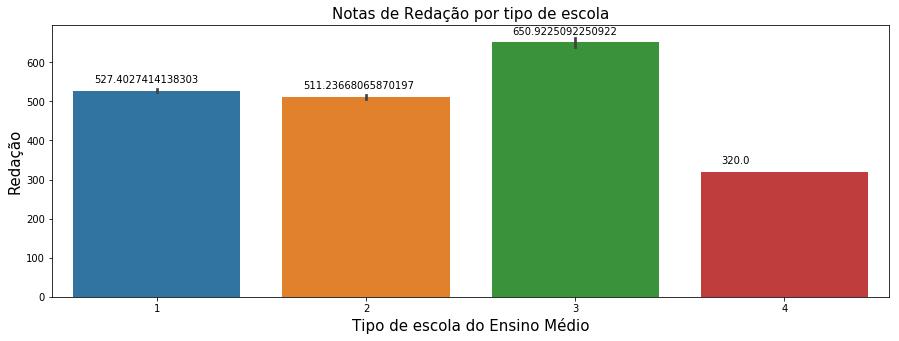

In [413]:
plt.figure(figsize=(15,5))
dx=sns.barplot(x='TP_ESCOLA',y='NU_NOTA_REDACAO',data=enem_treino)
plt.xlabel('Tipo de escola do Ensino Médio',size=15)
plt.ylabel('Redação',size=15)
plt.title('Notas de Redação por tipo de escola',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
plt.show()

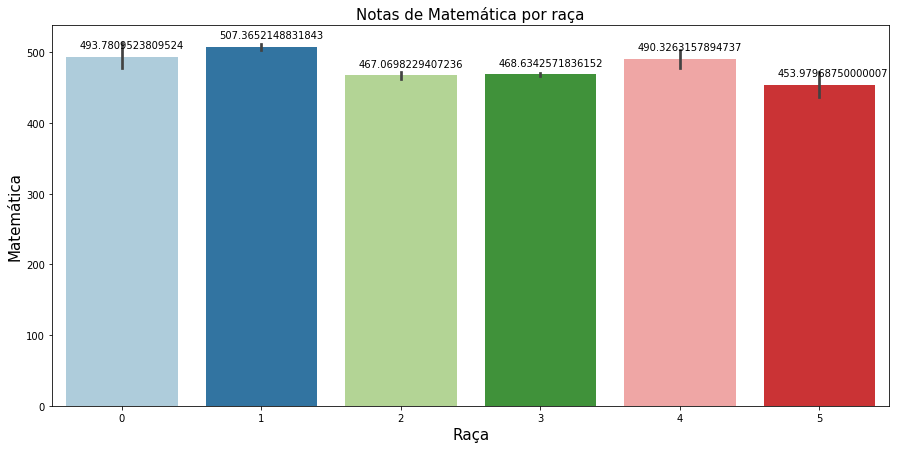

In [414]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_COR_RACA',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('Raça',size=15)
plt.ylabel('Matemática',size=15)
plt.title('Notas de Matemática por raça',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+12))
plt.show()

#0 - Não declarado
#1 - Branca
#2 - Preta
#3 - Parda
#4 - Amarela
#5 - Indígena 
#6 - Não dispõe da informação

#participantes brancos possuem maiores médias notas em matemática, seguidos e amarelos e não declarados

#Pardos, negros e indígenas as menores médias de notas

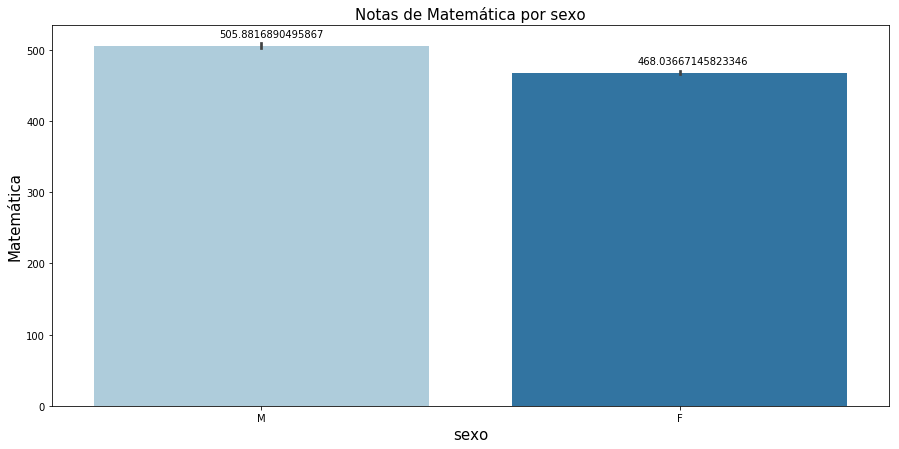

In [415]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_SEXO',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('sexo',size=15)
plt.ylabel('Matemática',size=15)
plt.title('Notas de Matemática por sexo',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+12))
plt.show()

#participantes do sexo masculino possuem um média de matemática maiores do que participantes do sexo feminino

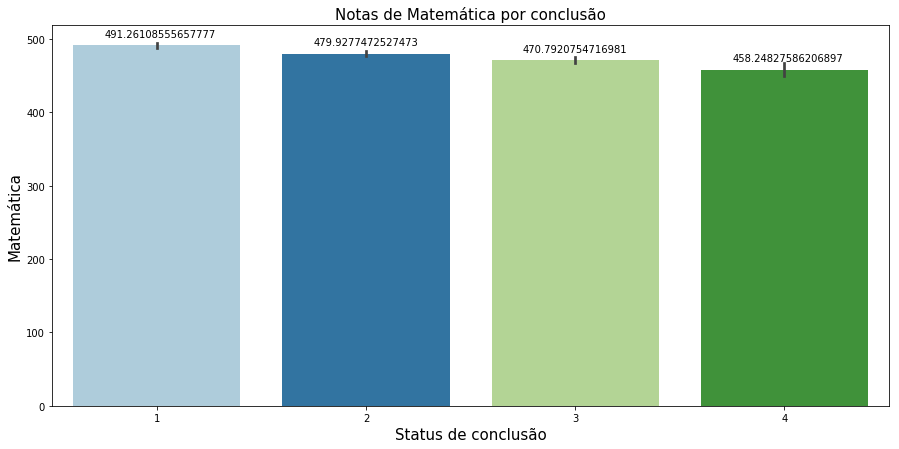

In [416]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_ST_CONCLUSAO',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('Status de conclusão',size=15)
plt.ylabel('Matemática',size=15)
plt.title('Notas de Matemática por conclusão',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+12))
plt.show()

#1 - Já concluí o Ensino Médio
#2 - Estou cursando e concluirei o Ensino Médio em 2016
#3 - Estou cursando e concluirei o Ensino Médio após 2016
#4 - Não concluí e não estou cursando o Ensino Médio

#Alunos que já concluíram possuem uma média em matemática maior

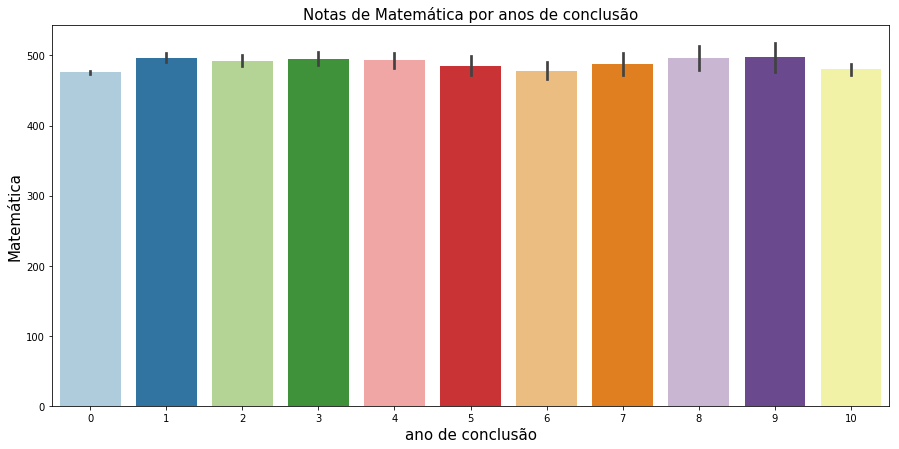

In [417]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_ANO_CONCLUIU',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('ano de conclusão',size=15)
plt.ylabel('Matemática',size=15)
plt.title('Notas de Matemática por anos de conclusão',size=15)
plt.show()

#0 - Não informado
#1 - 2015
#2 - 2014
#3 - 2013
#4 - 2012
#5 - 2011
#6 - 2010
#7 - 2009
#8 - 2008
#9 - 2007
#10 - Anterior a 2007

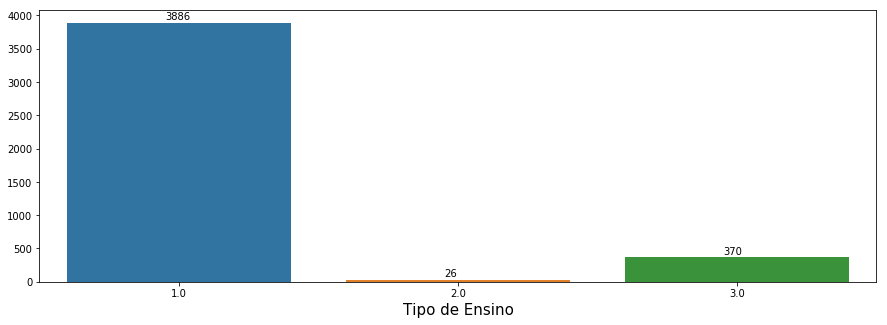

In [418]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_ENSINO',data=enem_treino)
plt.xlabel('Tipo de Ensino',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+50))
plt.show()

#A grande maioria dos alunos são de escolas cujo o ensino é regular

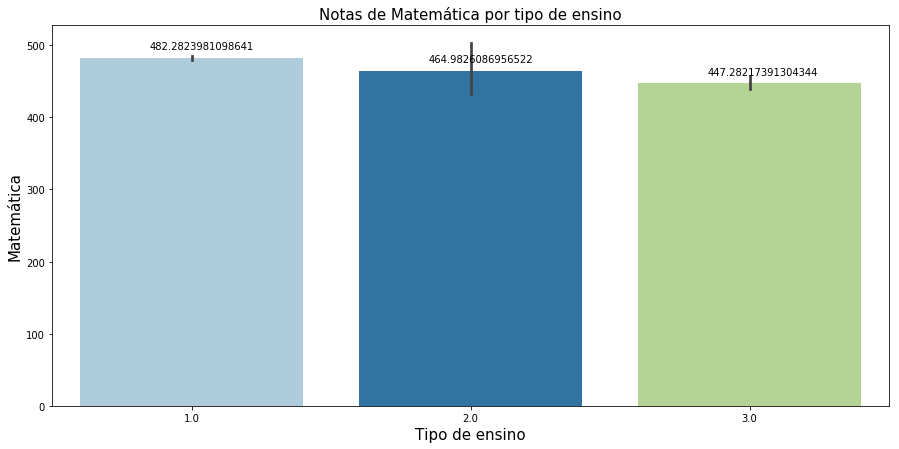

In [419]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_ENSINO',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('Tipo de ensino',size=15)
plt.ylabel('Matemática',size=15)
plt.title('Notas de Matemática por tipo de ensino',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+12))
plt.show()

#1 - Ensino Regular
#2 - Educação Especial - Modalidade Substitutiva
#3 - Educação de Jovens e Adultos

#Dentre os tipos de ensino a maior média são dos alunos provenientes de ensino regular

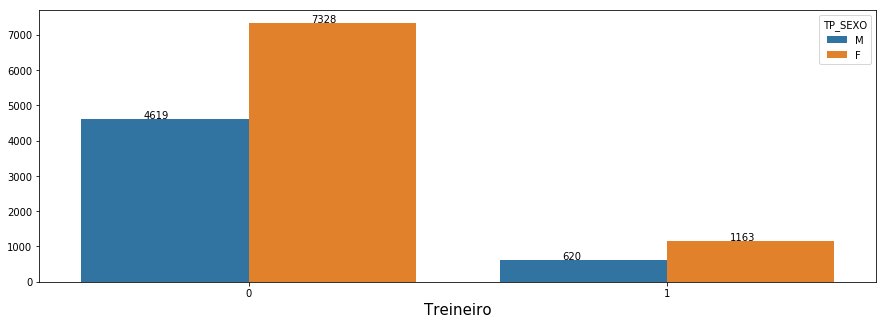

In [420]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='IN_TREINEIRO',data=enem_treino,hue='TP_SEXO')
plt.xlabel('Treineiro',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+15))
plt.show()

#A grande maioria dos alunos não são treineiros

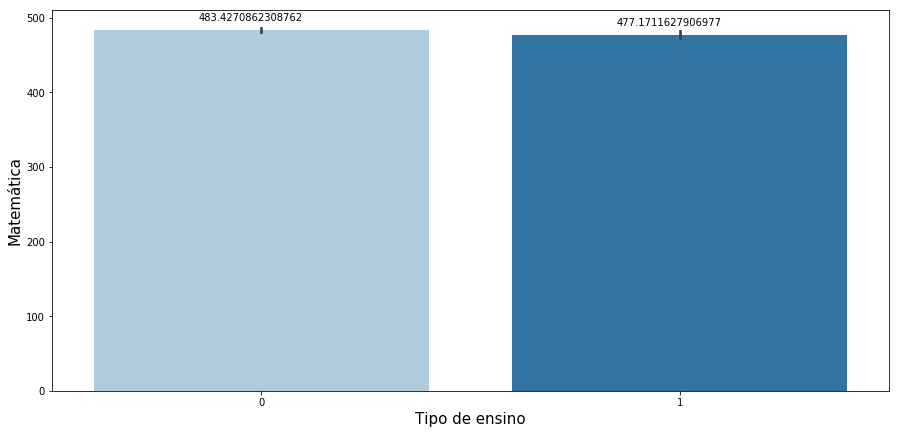

In [421]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='IN_TREINEIRO',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('Tipo de ensino',size=15)
plt.ylabel('Matemática',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+12))
plt.show()

#A média da nota dos alunos treineiros não parece se diferenciar muito dos que estão realmente fazendo o ENEM.

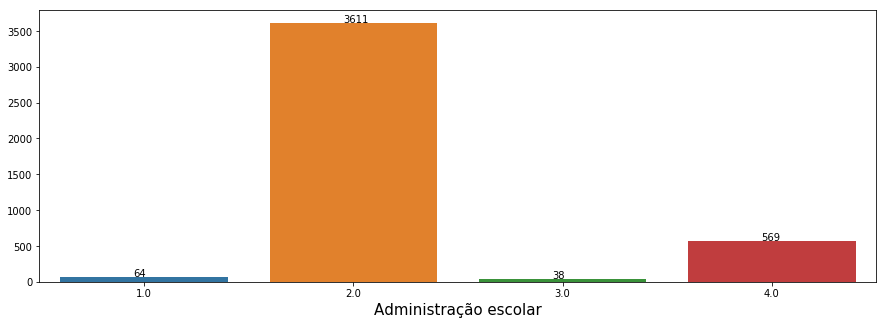

In [422]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_DEPENDENCIA_ADM_ESC',data=enem_treino)
plt.xlabel('Administração escolar',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+15))
plt.show()

#1 - Federal
#2 - Estadual
#3 - Municipal
#4 - Privada

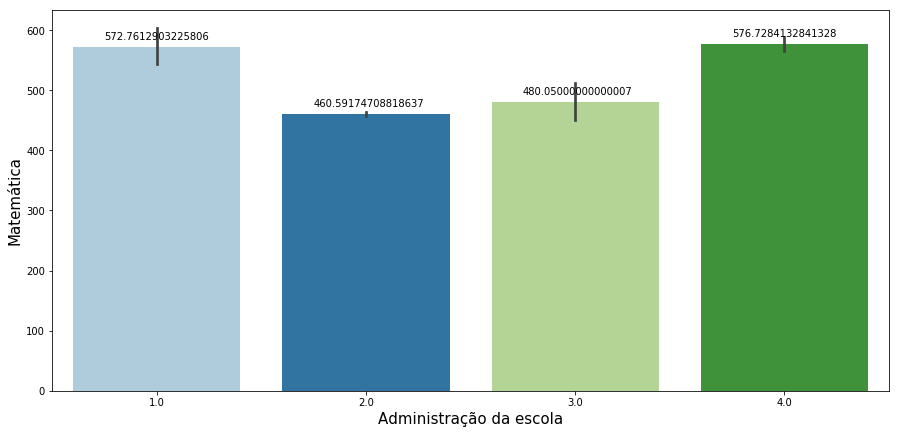

In [423]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_DEPENDENCIA_ADM_ESC',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('Administração da escola',size=15)
plt.ylabel('Matemática',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+12))
plt.show()

#Alunos de escola federal e de escolar privadas possuem as maiores médias

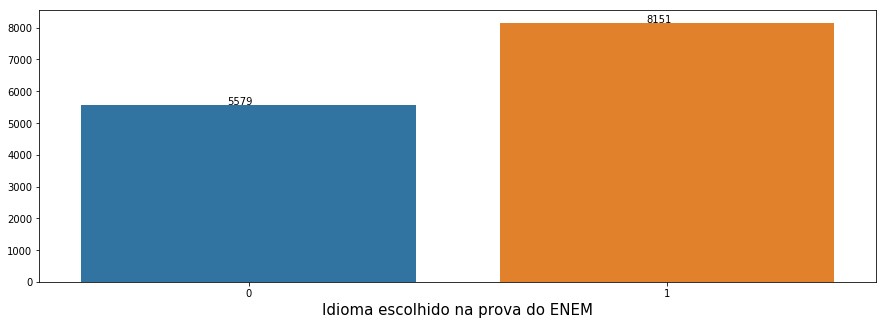

In [424]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_LINGUA',data=enem_treino)
plt.xlabel('Idioma escolhido na prova do ENEM',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+15))
plt.show()

#0 -  Inglês
#1 - Espanhol

#A maioria dos alunos optou pelo idioma espanhol

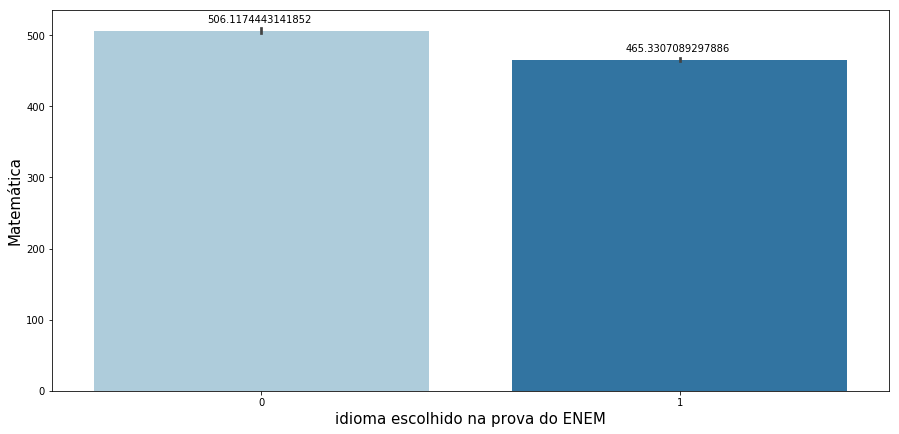

In [425]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='TP_LINGUA',y='NU_NOTA_MT',data=enem_treino,palette='Paired')
plt.xlabel('idioma escolhido na prova do ENEM',size=15)
plt.ylabel('Matemática',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.27, p.get_height()+12))
plt.show()

#Aluno que optaram pela prova de inglês tiveram uma média maior do que aqueles que optaram pela prova de espanhol

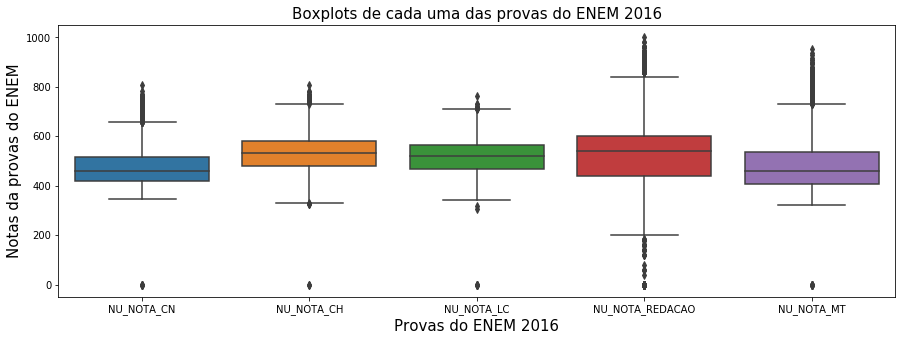

In [426]:
plt.figure(figsize=(15,5))
sns.boxplot(data=enem_treino[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_MT']])
plt.xlabel('Provas do ENEM 2016',size=15)
plt.ylabel('Notas da provas do ENEM',size=15)
plt.title('Boxplots de cada uma das provas do ENEM 2016',size=15)
plt.show()

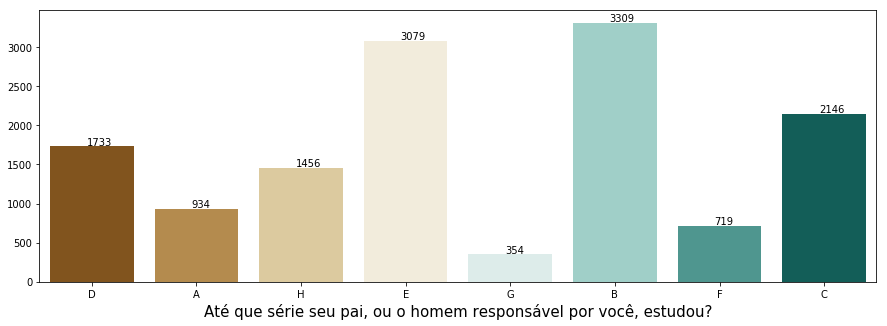

In [427]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q001',data=enem_treino,palette='BrBG')
plt.xlabel('Até que série seu pai, ou o homem responsável por você, estudou?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+15))
plt.show()

#A - Nunca estudou.
#B - Não completou a 4ª série/5º ano do Ensino Fundamental.
#C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
#D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
#E - Completou o Ensino Médio, mas não completou a Faculdade.
#F - Completou a Faculdade, mas não completou a Pós-graduação.
#G - Completou a Pós-graduação.
#H - Não sei.

#A maioria dos participantes tem pais ou responsáveis que não completou a 4ª série/5º ano do Ensino Fundamental
# ou Completou o Ensino Médio, mas não completou a Faculdade ou Completou a 8ª série/9º ano do Ensino Fundamental,
#mas não completou o Ensino Médio

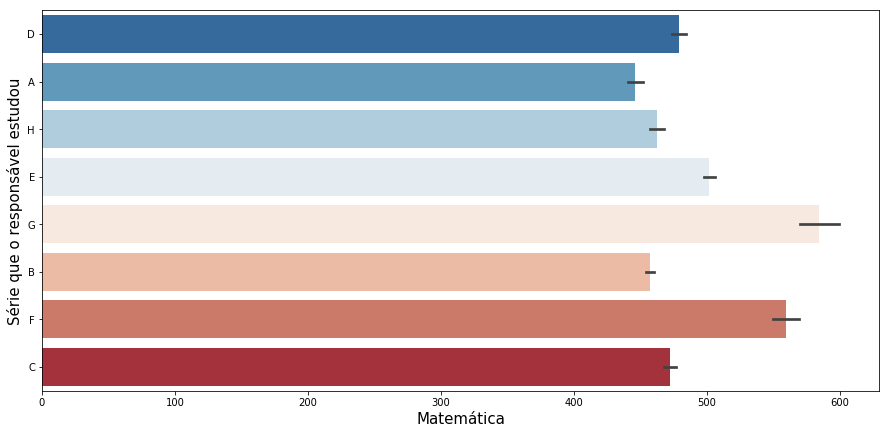

In [428]:
plt.figure(figsize=(15,7))
dx=sns.barplot(y='Q001',x='NU_NOTA_MT',data=enem_treino,palette='RdBu_r')
plt.ylabel('Série que o responsável estudou',size=15)
plt.xlabel('Matemática',size=15)
plt.title('',size=15)
plt.show()

# A maiores médias foram o grupo G (Completou a Pós-graduação),F (Completou a Faculdade, mas não completou a Pós-graduação),
#E (Completou o Ensino Médio, mas não completou a Faculdade) e D (Completou a 8ª série/9º ano do Ensino Fundamental,
#mas não completou o Ensino Médio)

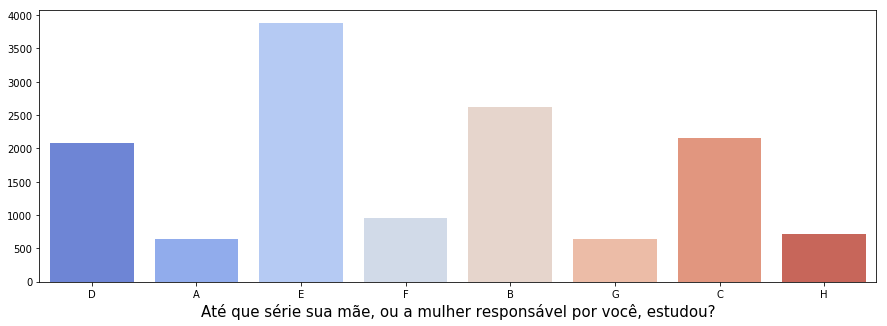

In [429]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q002',data=enem_treino,palette='coolwarm')
plt.xlabel('Até que série sua mãe, ou a mulher responsável por você, estudou?',size=15)
plt.ylabel('')
plt.title('')
plt.show()

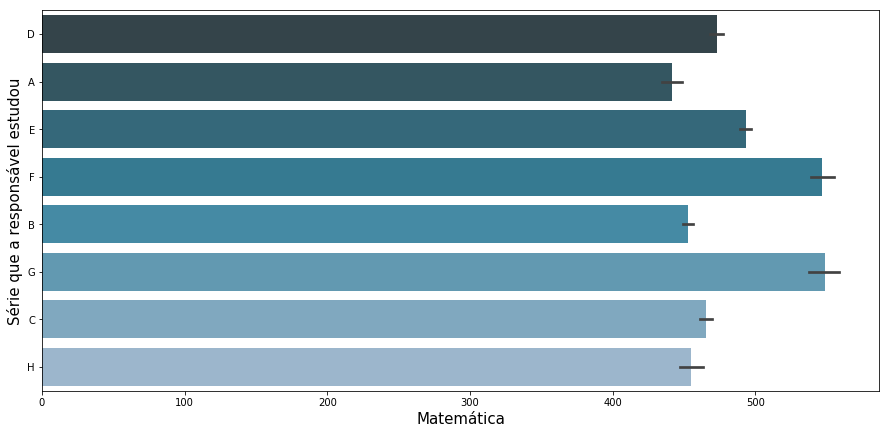

In [430]:
plt.figure(figsize=(15,7))
dx=sns.barplot(y='Q002',x='NU_NOTA_MT',data=enem_treino,palette='PuBuGn_d')
plt.ylabel('Série que a responsável estudou',size=15)
plt.xlabel('Matemática',size=15)
plt.title('',size=15)
plt.show()

#O mesmo comportamento se repete com a média das notas quando comparado com a série a responsável estudou

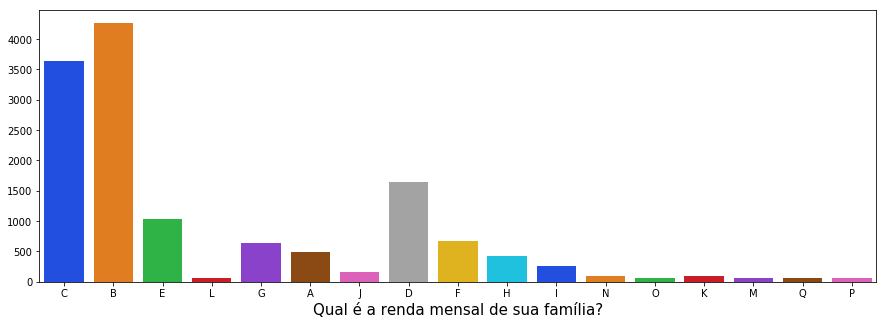

In [431]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q006',data=enem_treino,palette='bright')
plt.xlabel('Qual é a renda mensal de sua família?',size=15)
plt.ylabel('')
plt.title('')
plt.show()

#A - Nenhuma renda.
#B - Até R$ 880,00.
#C - De R$ 880,01 até R$ 1.320,00.
#D - De R$ 1.320,01 até R$ 1.760,00.
#E - De R$ 1.760,01 até R$ 2.200,00.
#F - De R$ 2.200,01 até R$ 2.640,00.
#G - De R$ 2.640,01 até R$ 3.520,00.
#H - De R$ 3.520,01 até R$ 4.400,00.
#I - De R$ 4.400,01 até R$ 5.280,00.
#J - De R$ 5.280,01 até R$ 6.160,00.
#K - De R$ 6.160,01 até R$ 7.040,00.
#L - De R$ 7.040,01 até R$ 7.920,00.
#M - De R$ 7.920,01 até R$ 8.800,00.
#N - De R$ 8.800,01 até R$ 10.560,00.
#O - De R$ 10.560,01 até R$ 13.200,00.
#P - De R$ 13.200,01 até R$ 17.600,00.
#Q - Mais de R$ 17.600,00.


#Por renda, os participantes do ENEM 2016 são em sua maioria dos que recebem até R$ 880,00, De R$ 880,01 até R$ 1.320,00 e 
#De R$ 1.320,01 até R$ 1.760,00

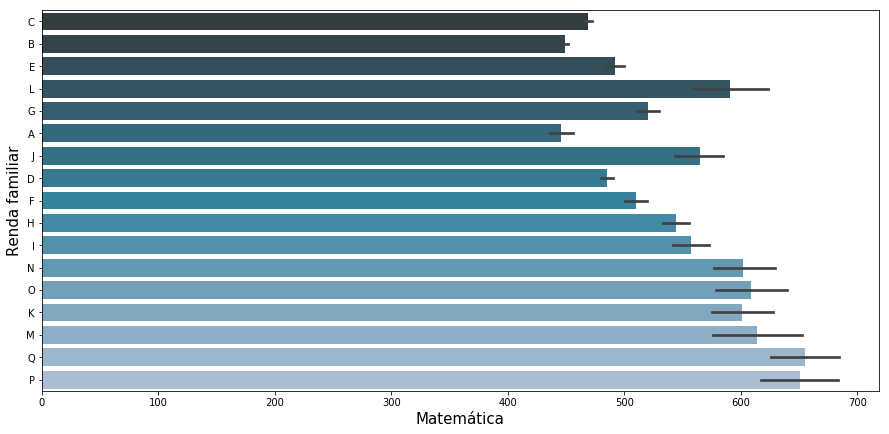

In [432]:
plt.figure(figsize=(15,7))
dx=sns.barplot(y='Q006',x='NU_NOTA_MT',data=enem_treino,palette='PuBuGn_d')
plt.ylabel('Renda familiar',size=15)
plt.xlabel('Matemática',size=15)
plt.title('',size=15)
plt.show()

#As maiores médias foram de aluno dos grupos de maiores rendas

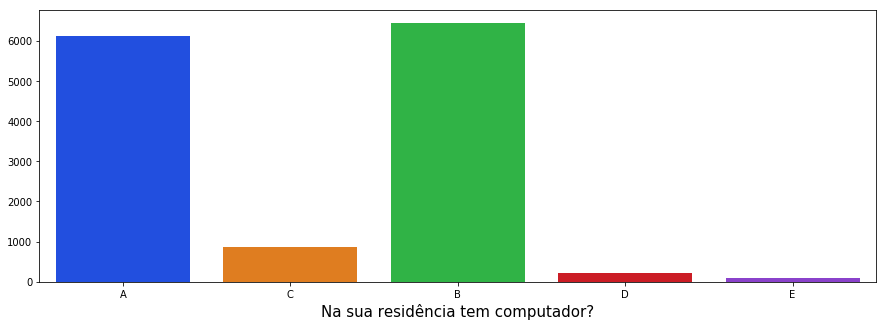

In [433]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q024',data=enem_treino,palette='bright')
plt.xlabel('Na sua residência tem computador?',size=15)
plt.ylabel('')
plt.title('')
plt.show()

#A - Não.
#B - Sim, um.
#C - Sim, dois.
#D - Sim, três.
#E - Sim, quatro ou mais.

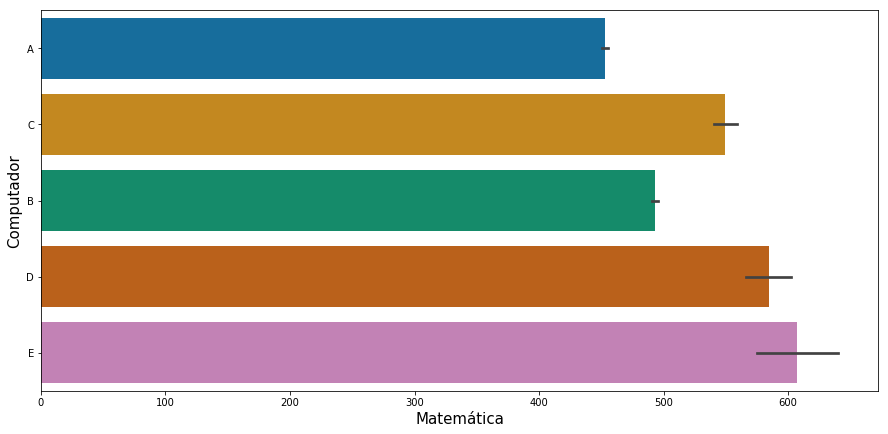

In [434]:
plt.figure(figsize=(15,7))
dx=sns.barplot(y='Q024',x='NU_NOTA_MT',data=enem_treino,palette='colorblind')
plt.ylabel('Computador',size=15)
plt.xlabel('Matemática',size=15)
plt.title('',size=15)
plt.show()

#A maiores médias são de aluno que possuem mais computadores em casa

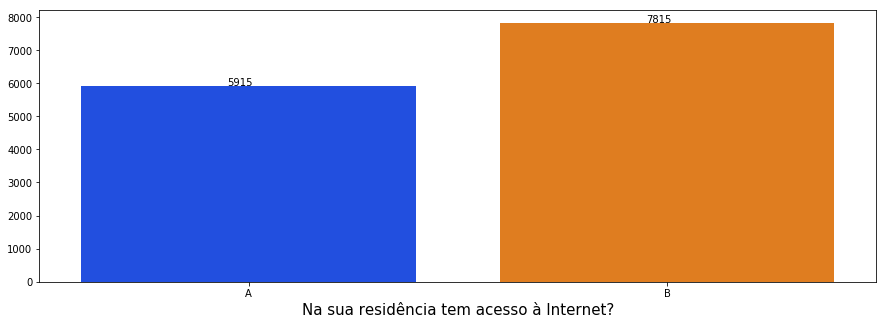

In [435]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q025',data=enem_treino,palette='bright')
plt.xlabel('Na sua residência tem acesso à Internet?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+15))
plt.show()

#A - Não.
#B - Sim.

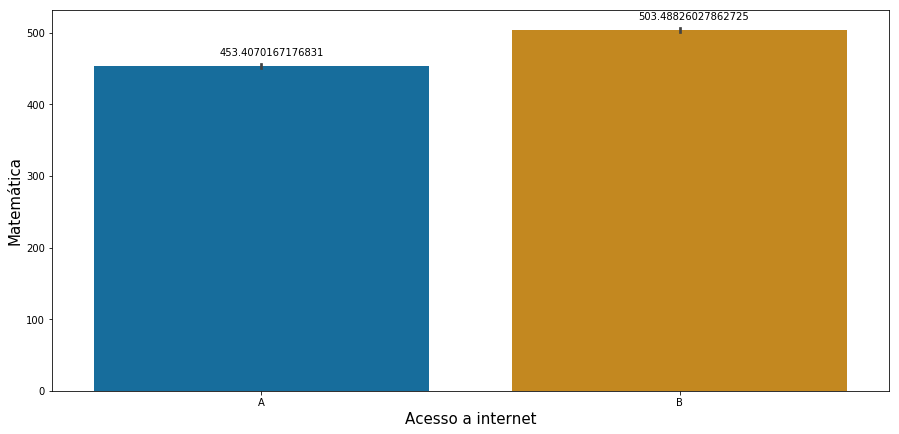

In [436]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='Q025',y='NU_NOTA_MT',data=enem_treino,palette='colorblind')
plt.xlabel('Acesso a internet',size=15)
plt.ylabel('Matemática',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+15))
plt.show()

#A média da nota de matemática de quem tem acesso a internet é maior

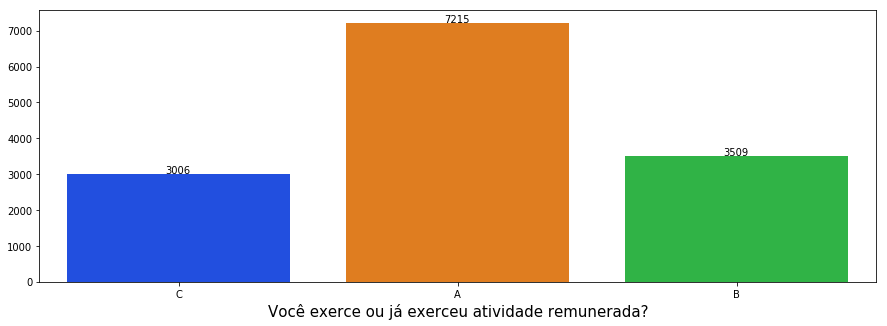

In [437]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q026',data=enem_treino,palette='bright')
plt.xlabel('Você exerce ou já exerceu atividade remunerada?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+15))
plt.show()

#A - Não, nunca trabalhei.
#B - Sim, já trabalhei, mas não estou trabalhando.
#C - Sim, estou trabalhando.

#mais de 50% dos participantes já trabalharam, mas atualmente não trabalham

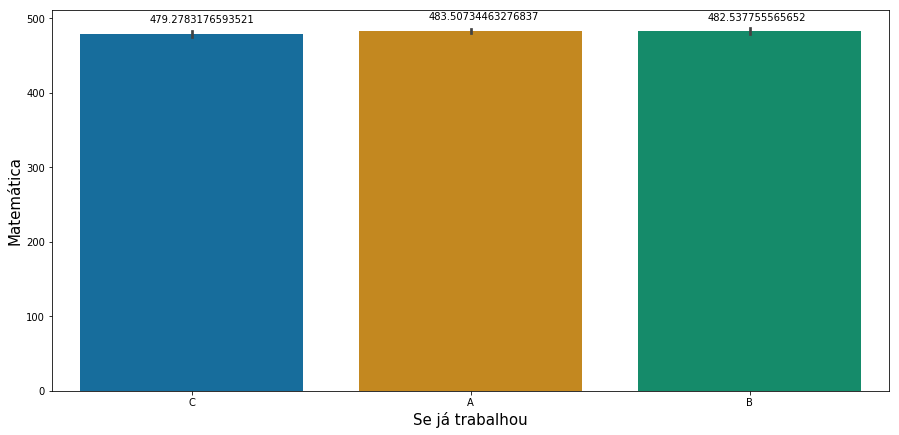

In [438]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='Q026',y='NU_NOTA_MT',data=enem_treino,palette='colorblind')
plt.xlabel('Se já trabalhou',size=15)
plt.ylabel('Matemática',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+15))
plt.show()

#As médias das notas parecem ser semelhantes, mas o grupo que nunca trabalhou a nota foi ligeiramente maior

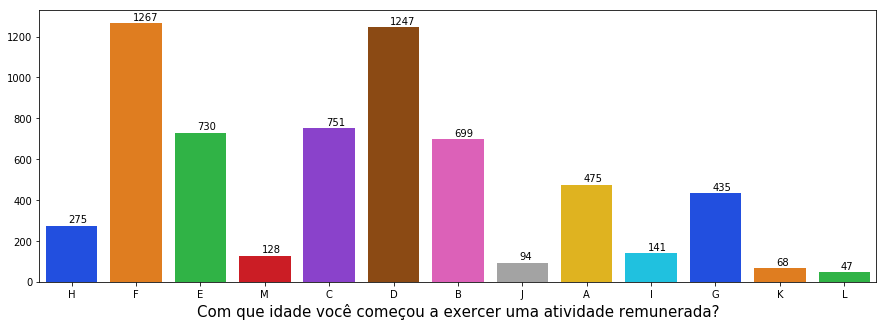

In [439]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q027',data=enem_treino,palette='bright')
plt.xlabel('Com que idade você começou a exercer uma atividade remunerada?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+15))
plt.show()

#A	Menos de 14 anos.
#B	14 anos.
#C	15 anos.
#D	16 anos.
#E	17 anos.
#F	18 anos.
#G	19 anos.
#H	20 anos.
#I	21 anos.
#J	22 anos.
#K	23 anos.
#L	24 anos.
#M	25 anos ou mais.

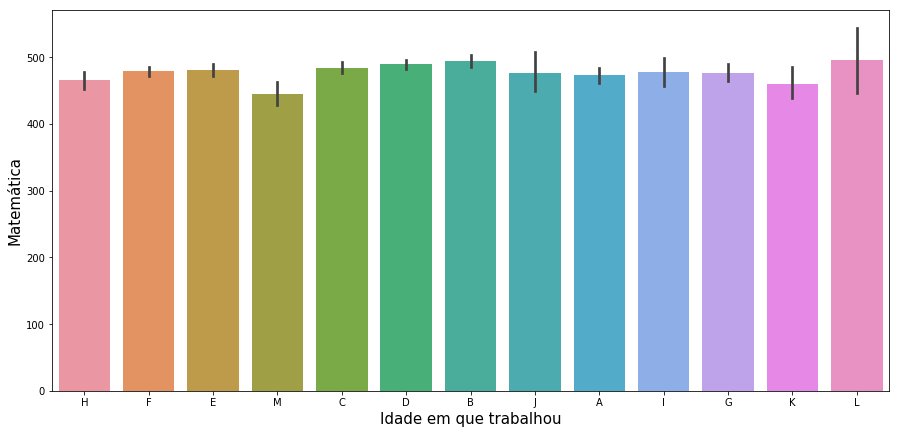

In [440]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='Q027',y='NU_NOTA_MT',data=enem_treino)
plt.xlabel('Idade em que trabalhou',size=15)
plt.ylabel('Matemática',size=15)
plt.title('',size=15)
plt.show()

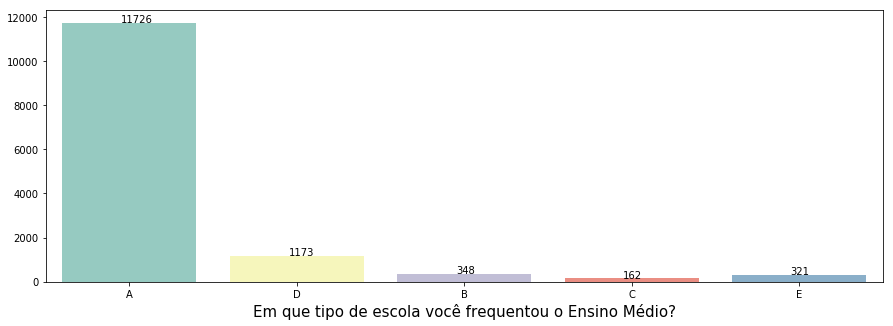

In [441]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q047',data=enem_treino,palette='Set3')
plt.xlabel('Em que tipo de escola você frequentou o Ensino Médio?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+15))
plt.show()

#A	Somente em escola pública.
#B	Parte em escola pública e parte em escola privada sem bolsa de estudo integral.
#C	Parte em escola pública e parte em escola privada com bolsa de estudo integral.
#D	Somente em escola privada sem bolsa de estudo integral.
#E	Somente em escola privada com bolsa de estudo integral.


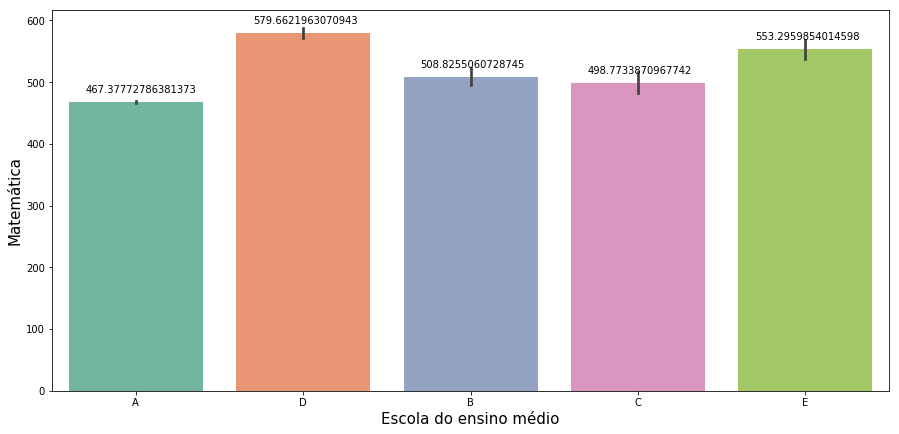

In [442]:
plt.figure(figsize=(15,7))
dx=sns.barplot(x='Q047',y='NU_NOTA_MT',data=enem_treino,palette='Set2')
plt.xlabel('Escola do ensino médio',size=15)
plt.ylabel('Matemática',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+15))
plt.show()

#As maiores médias são dos que estudaram em escola privada

# SELEÇÃO DE FEATURES

<IPython.core.display.Javascript object>


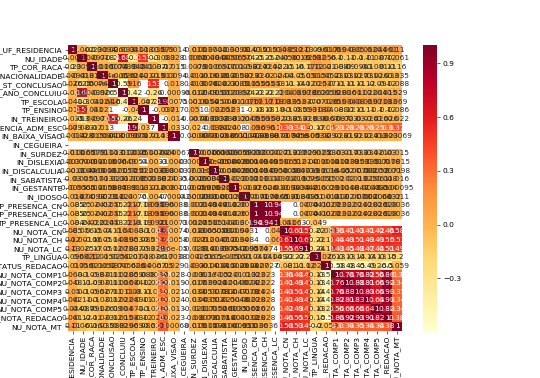

In [450]:
#Vamos ver novamente a correlação entre as features
plt.figure(figsize=(10,7))
correlacao2=enem_treino.corr()
sns.heatmap(correlacao2, annot = True, cmap = "YlOrRd")

In [451]:
#Vamos atribuir uma variável a correalção entre as features
correlacao=enem_treino.corr()

#Vamos agora imprimir a correlação das features com 'NU_NOTA_MT'
print(correlacao['NU_NOTA_MT'])

#Vemos abaixo que as variáveis 'TP_COR_RACA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_LINGUA','NU_NOTA_COMP1',
#                              'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO'
#são as que possuem maiores resultado de correlação com 'NU_NOTA_MT'

CO_UF_RESIDENCIA          0.107493
NU_IDADE                 -0.061485
TP_COR_RACA              -0.157364
TP_NACIONALIDADE         -0.034965
TP_ST_CONCLUSAO          -0.087869
TP_ANO_CONCLUIU           0.029039
TP_ESCOLA                 0.069304
TP_ENSINO                -0.086353
IN_TREINEIRO             -0.022287
TP_DEPENDENCIA_ADM_ESC    0.373233
IN_BAIXA_VISAO            0.000685
IN_CEGUEIRA                    NaN
IN_SURDEZ                -0.015249
IN_DISLEXIA               0.001453
IN_DISCALCULIA            0.009813
IN_SABATISTA             -0.016459
IN_GESTANTE              -0.000945
IN_IDOSO                 -0.011336
TP_PRESENCA_CN            0.003552
TP_PRESENCA_CH            0.003552
TP_PRESENCA_LC                 NaN
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
TP_LINGUA                -0.201726
TP_STATUS_REDACAO        -0.059376
NU_NOTA_COMP1             0.299402
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP3       

In [452]:
#atribuindo a uma variável as colunas da base de treino selecionadas por correlação
features1=['TP_COR_RACA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
           'TP_LINGUA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
           'NU_NOTA_REDACAO','NU_NOTA_MT']

In [453]:
#atribuindo a uma variável as colunas da base de teste selecionadas por correlação
features2=['TP_COR_RACA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
           'TP_LINGUA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
           'NU_NOTA_REDACAO']

In [454]:
#definindo as colunas da base de treino
enem_treino=enem_treino[features1]

In [455]:
#definindo as colu as da base de teste
enem_teste=enem_teste[features2]

In [456]:
#visualizando as colunas da base de treino
enem_treino.columns.values

array(['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT'],
      dtype=object)

In [457]:
#visualizando as colunas da base de teste
enem_teste.columns.values

array(['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'], dtype=object)

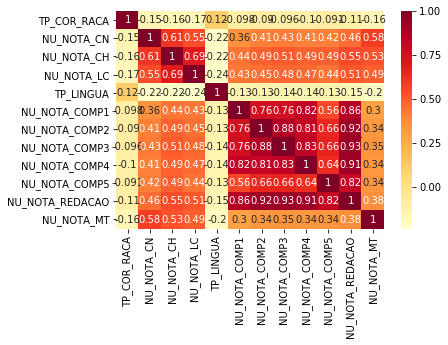

In [459]:
#Vamos ver novamente a correlação entre as features
%matplotlib inline
correlacao2=enem_treino.corr()
sns.heatmap(correlacao2, annot = True, cmap = "YlOrRd")

In [460]:
enem_treino.columns

Index(['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT'],
      dtype='object')

In [461]:
#visualizando os missing values da base de treino
enem_treino.isnull().sum()

TP_COR_RACA           0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
TP_LINGUA             0
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
NU_NOTA_MT         3597
dtype: int64

In [462]:
#visualizando os missing values da base de teste
enem_teste.isnull().sum()

TP_COR_RACA           0
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
TP_LINGUA             0
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
NU_NOTA_REDACAO    1199
dtype: int64

In [463]:
#Imputando com zero, pois se o aluno não tem essa nota é porque faltou a essa prova, então lhe atribuimos o valor 0

enem_treino['NU_NOTA_CN'].fillna(0,inplace=True)
enem_treino['NU_NOTA_CH'].fillna(0,inplace=True)
enem_treino['NU_NOTA_LC'].fillna(0,inplace=True)
enem_treino['NU_NOTA_COMP1'].fillna(0,inplace=True)
enem_treino['NU_NOTA_COMP2'].fillna(0,inplace=True)
enem_treino['NU_NOTA_COMP3'].fillna(0,inplace=True)
enem_treino['NU_NOTA_COMP4'].fillna(0,inplace=True)
enem_treino['NU_NOTA_COMP5'].fillna(0,inplace=True)
enem_treino['NU_NOTA_REDACAO'].fillna(0,inplace=True)
enem_treino['NU_NOTA_MT'].fillna(0,inplace=True)

enem_teste['NU_NOTA_CN'].fillna(0,inplace=True)
enem_teste['NU_NOTA_CH'].fillna(0,inplace=True)
enem_teste['NU_NOTA_LC'].fillna(0,inplace=True)
enem_teste['NU_NOTA_COMP1'].fillna(0,inplace=True)
enem_teste['NU_NOTA_COMP2'].fillna(0,inplace=True)
enem_teste['NU_NOTA_COMP3'].fillna(0,inplace=True)
enem_teste['NU_NOTA_COMP4'].fillna(0,inplace=True)
enem_teste['NU_NOTA_COMP5'].fillna(0,inplace=True)
enem_teste['NU_NOTA_REDACAO'].fillna(0,inplace=True)

In [464]:
#observando se há missing values

#vemos que não tem mais missing values

display(enem_treino.isnull().sum())
display(enem_teste.isnull().sum())

TP_COR_RACA        0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
TP_LINGUA          0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
NU_NOTA_MT         0
dtype: int64

TP_COR_RACA        0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
TP_LINGUA          0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

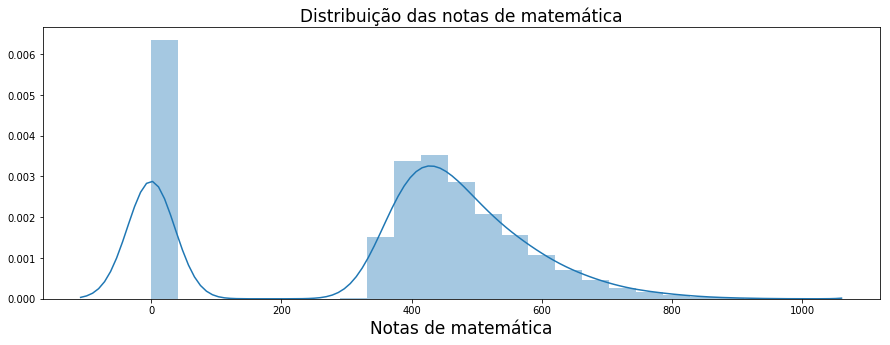

In [465]:
plt.figure(figsize=(15,5))
sns.distplot(enem_treino['NU_NOTA_MT'])
plt.xlabel('Notas de matemática',size=17)
plt.title('Distribuição das notas de matemática',size=17)
plt.show()

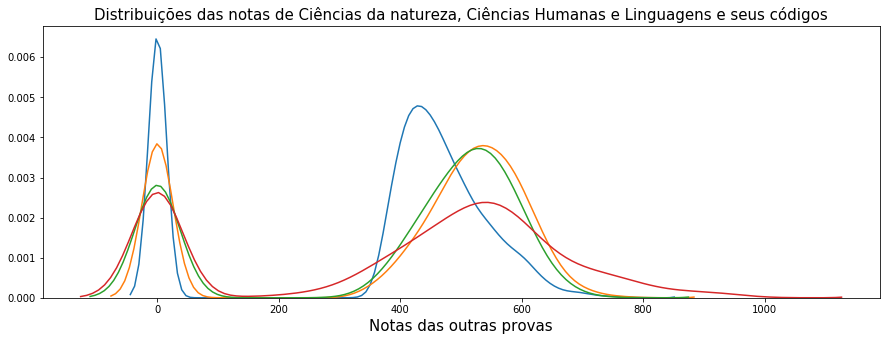

In [466]:
plt.figure(figsize=(15,5))
sns.distplot(enem_treino['NU_NOTA_CN'],hist=False)
sns.distplot(enem_treino['NU_NOTA_CH'],hist=False)
sns.distplot(enem_treino['NU_NOTA_LC'],hist=False)
sns.distplot(enem_treino['NU_NOTA_REDACAO'],hist=False)
plt.title('Distribuições das notas de Ciências da natureza, Ciências Humanas e Linguagens e seus códigos',size=15)
plt.xlabel('Notas das outras provas',size=15)
plt.show()

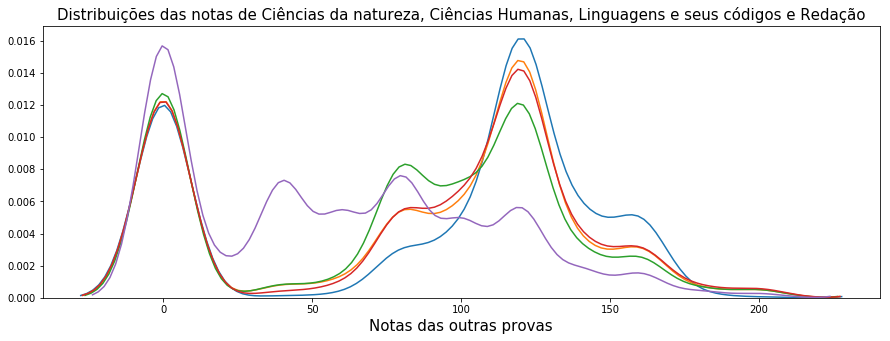

In [467]:
plt.figure(figsize=(15,5))
sns.distplot(enem_treino['NU_NOTA_COMP1'],hist=False)
sns.distplot(enem_treino['NU_NOTA_COMP2'],hist=False)
sns.distplot(enem_treino['NU_NOTA_COMP3'],hist=False)
sns.distplot(enem_treino['NU_NOTA_COMP4'],hist=False)
sns.distplot(enem_treino['NU_NOTA_COMP5'],hist=False)
plt.title('Distribuições das notas de Ciências da natureza, Ciências Humanas, Linguagens e seus códigos e Redação',size=15)
plt.xlabel('Notas das outras provas',size=15)
plt.show()

# SEPARANDO OS DADOS

In [127]:
#separando a feature de classe
classe_treino=enem_treino['NU_NOTA_MT']

In [128]:
#separando as demais features
treino=enem_treino.drop('NU_NOTA_MT',axis=1)

In [129]:
#observando as dimensões dos datasets
print(treino.shape,classe_treino.shape,enem_teste.shape)

(13730, 11) (13730,) (4576, 11)


In [130]:
#importando o standardscaler
from sklearn.preprocessing import StandardScaler

In [131]:
#instanciando o standardscaler
sc = StandardScaler()

In [132]:
#padronizando treino e a base de teste
treino=sc.fit_transform(treino)
enem_teste=sc.fit_transform(enem_teste)

#Optei por não aplicar o StandardScaler nos dados de 'NU_NOTA_MT'
classe_treino

0        399.4
1        459.8
2          0.0
3          0.0
4          0.0
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64

# APLICAÇÃO DO MODELO E GERAÇÃO DAS PREVISÕES

In [133]:
#importando o modelo de ML Regressão Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor

#instanciando o modelo
enem_gbr=GradientBoostingRegressor()

#treinando o modelo
enem_gbr.fit(treino,classe_treino)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
#Gerando as previsões
y_pred_gbr=enem_gbr.predict(enem_teste)
y_pred_gbr

array([4.35584337e+02, 4.47240068e+02, 5.93311595e+02, ...,
       6.79622049e+02, 4.45750053e+02, 4.58602669e-01])

In [135]:
#atribuindo uma lista com variáveis a serem criadas no pdf
features4=['NU_INSCRICAO','NU_NOTA_MT']

In [136]:
#gerando e salvando o arquivo com as previões
enem_teste2=pd.read_csv("test.csv")
enem_teste2['NU_NOTA_MT']=y_pred_gbr
enem_teste2=enem_teste2[features4]
enem_teste2.to_csv('answer.csv',index=False)

# CONCLUSÃO

O score mínimo desse desafio era de 90% e com esse modelo consegui o score de **93.6247205592824%** e passei no desafio da semana 8 do AceleraDev Codenation.

<IPython.core.display.Javascript object>


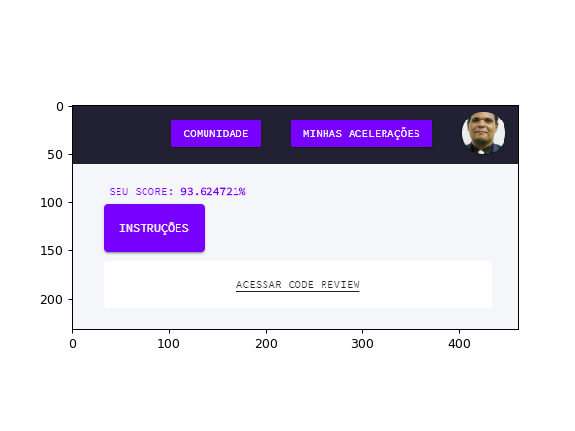

In [7]:
img = mpimg.imread('score_semana8.png')
imgplot = plt.imshow(img)